# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 4 - Elliot Linsey

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Calculating Bridge Age 
3. Section 3: Exploratory Data Analysis 
  * Section 3.1: Comparing Continuous Variables
4. Section 4: Performing Linear Regression
  * 
5. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=3)

## Section 1: Introduction

There are two aims of this document, one is to use regression models to predict and explain the variability in the number of births. We will achieve this by using two different predictors separately: the number of storks and the population size. We will then use a bootstrap technique to estimate the distribution of the difference of the $r^2$ score for both models.

The second part of this document uses regression models to predict the number of storks. The predictors are at first the land area, then another regression is performed using multiple linear regression. The predictors for multiple linear regression are created from variables within the original dataset these new predictors are Suitable Area which is determined from SuitableAreaPercent and Area. The second predictor is Population Density which is derived from Humans and Area. The bootstrap technique is then utilised again to estimate the distribution of the difference of the root mean squared error parameter for both models.

## 1.1: Loading the Data

Here we load the data into a dataframe, one additional variable has been appended to the original dataset, this being SuitableAreaPercent.

In [2]:
df = pd.read_csv('storks.csv')
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


## Section 2: Analysis 1 - Predicting Birth Rate



## Section 2.1: Storks and Birth Rate

Plotting an initial scatter graph of Storks vs BirthRate, we see a fairly spread out distribution of points. A number of countries have very low numbers of storks with a high variance in terms of birth rate. When we assess the correlation between the two variables however, we find a fairly strong positive correlation of 0.62. 

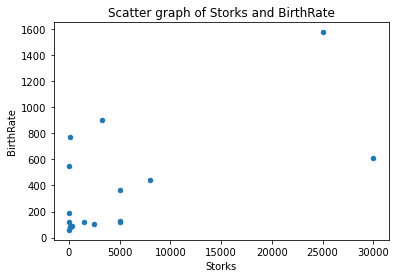

Correlation between Storks and BirthRate: 0.62


In [3]:
df.plot.scatter('Storks','BirthRate')
plt.title('Scatter graph of Storks and BirthRate')
plt.show()
print('Correlation between Storks and BirthRate: ' + str(round(df['Storks'].corr(df.BirthRate),3)))

Here I convert the columns we will use in the future regressions from panda Series to numpy arrays. I then initialise and fit the first regresson of our Storks predictor and target BirthRate.

In [4]:
storks = df.Storks.to_numpy().reshape(-1,1)
humans = df.Humans.to_numpy().reshape(-1,1)
area = df.Area.to_numpy().reshape(-1,1)
y = df.BirthRate.to_numpy().reshape(-1,1)
reg = LinearRegression().fit(storks,y)

Although the data suggests a strong positive correlation, when fitting the line of regression we see that it only passes close to 3 points. The $r^2$ score is a value of 0.385 which is not very high and implies that only 38.5% of the variance within the data has been accounted for. This suggests that the remaining 61.5% is still unaccounted for and thus the effect of storks on the variance of BirthRate is quite low. 

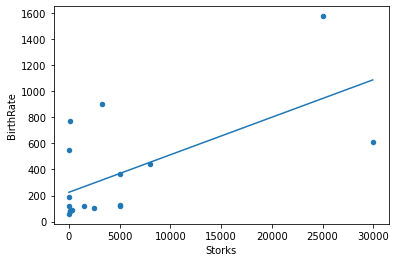

In [5]:
ranges = np.arange(0,30000,50).reshape(-1,1)
y_ranges = reg.predict(ranges)
df.plot.scatter('Storks','BirthRate')
plt.plot(ranges,y_ranges)
plt.show()

In [6]:
print(f'Regression Coefficient: {np.round(reg.coef_.squeeze(),3)}')
print(f'Regression Intercept: {np.round(reg.intercept_.squeeze(),3)}')
print(f'r2 Score: {np.round(reg.score(storks,y),3)}')

Regression Coefficient: 0.029
Regression Intercept: 225.029
r2 Score: 0.385


## Section 2.2: Humans and Birth Rate

In plotting the initial scatter graph for Humans and BirthRate we can instantly see a clearer positive correlation. This is confirmed in calculating the correlation coefficient between the two, which equals 0.851.  

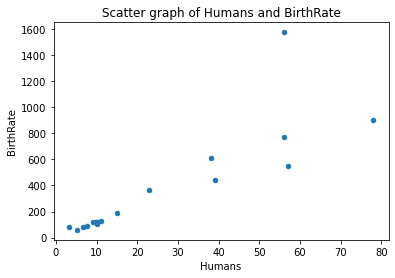

Correlation between Humans and BirthRate: 0.851


In [7]:
df.plot.scatter('Humans','BirthRate')
plt.title('Scatter graph of Humans and BirthRate')
plt.show()
print('Correlation between Humans and BirthRate: ' + str(round(df['Humans'].corr(df.BirthRate),3)))

The regression line for these 2 variables is far closer to the plotted points, indicating a better fit. The $r^2$ score is also much high, accounting for 72.5% of the variance within the data. However the intercept is slightly nonsensical as it predicts that when you have 0 Humans, you have a BirthRate of -8 which is logically impossible. 

It is important when comparing the regression coefficients that you take into account their scaling. For example, the Storks and BirthRate regression has a coefficient of 0.029 whilst the coefficient for Humans and BirthRate is 14.834. Whilst the Humans coefficient is far larger than Storks, they are both on vastly different scales with Humans having a range of 0 to 80 and Storks having a range of 0 to 30000. When you look at both the actual lines drawn on the graphs, you see that they have quite similar gradients. The coefficients are so different as if we used the coefficient of Humans (14.834) to predict BirthRate values for the Storks graph, we would have extremely high and very wrong values. This is important to remember later when performing multiple linear regression which will have more than one coefficient.   

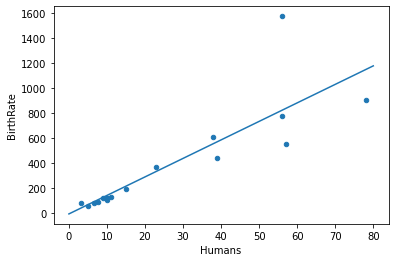

Regression Coefficient: 14.834
Regression Intercept: -8.445
r2 Score: 0.725


In [8]:
reg2 = LinearRegression().fit(humans,y)
ranges2 = np.arange(0,85,5).reshape(-1,1)
y_ranges2 = reg2.predict(ranges2)
df.plot.scatter('Humans','BirthRate')
plt.plot(ranges2,y_ranges2)
plt.show()
print(f'Regression Coefficient: {np.round(reg2.coef_.squeeze(),3)}')
print(f'Regression Intercept: {np.round(reg2.intercept_.squeeze(),3)}')
print(f'r2 Score: {np.round(reg2.score(humans,y),3)}')

## Section 2.3: Bootstrap 

Within this section we will use the bootstrap technique to estimate the distribution of $r^2$ scores for both regressions of Storks and BirthRate and Humans and BirthRate. Then, we will estimate the distribution of differences of $r^2$ scores between these two regressions and find the 90% confidence intervals of the data. 

Below, I create a function that automates generating the $r^2$ score with one predictor variable and test it on the previous variables of Storks and BirthRate to make sure it calculates the same result. 

In [9]:
def doReg(predict,target):
    x = predict.to_numpy().reshape(-1,1)
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(x,y)
    return reg.score(x,y)

print(f'r2 Score: {np.round(doReg(df.Storks,df.BirthRate),3)}')

r2 Score: 0.385


Here is the bootstrap method, I create an empty list to append $r^2$ scores. I choose random samples from both Storks and BirthRate with replacement as well as making the sample the same size as the original dataframe. I then calculate the $r^2$ score with my previous function 'doReg()' and append the score to the list 'results'. I repeat this process 500 times so that results contains 500 $r^2$ scores. 

Using these scores I plot a histogram to see the distribution. It appears to be bimodal with a peak around 0 and a peak centering around 0.4, with decreasing scores from 0.6 to 0.9. Considering our original $r^2$ score was 0.385, this peak around 0.4 is not surprising, however the high prevalence of scores around 0 may imply that our predictor variable does not account for the variance within the BirthRate data very well and that the specific result of 0.385 could have arisen due to random chance. 

In [10]:
results = []

for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['Storks','BirthRate']].iloc[sample]
    results.append(doReg(sample.Storks,sample.BirthRate))

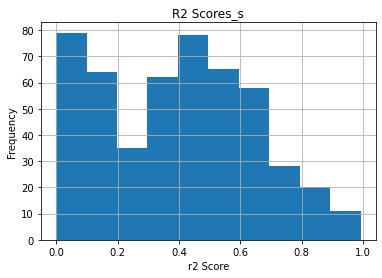

In [11]:
results_storks = pd.DataFrame(results).rename(columns={0:'R2 Scores_s'})
results_storks.hist()
plt.xlabel('r2 Score')
plt.ylabel('Frequency')
plt.show()

My bootstrap method for Humans and BirthRate follows the same technique as before. 

Plotting the $r^2$ scores shows a very different distribution compared to Storks and BirthRate. Whilst it is still bimodal, with peaks centered around 0.7 and 9.5, the lowest score achieved is just below 0.6 which is very different from Storks and BirthRate. The distribution has a far smaller range in the higher regions of the $r^2$ score, this implies that our predictor variable may be better at accounting for variance within the BirthRate data. 

In [12]:
results = []

for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['Humans','BirthRate']].iloc[sample]
    results.append(doReg(sample.Humans,sample.BirthRate))

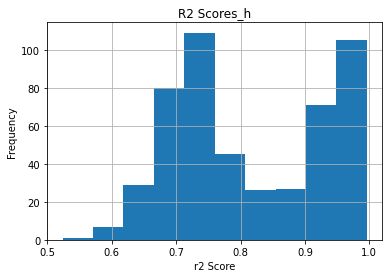

In [13]:
results_humans = pd.DataFrame(results).rename(columns={0:'R2 Scores_h'})
results_humans.hist()
plt.xlabel('r2 Score')
plt.ylabel('Frequency')
plt.show()

Here I join the two dataframes containing the $r^2$ scores together so that the differences between them can be calculated. 

In [14]:
results_full = results_humans.join(results_storks)
results_full.head()

,R2 Scores_h,R2 Scores_s
0,0.825206,0.127771
1,0.744359,0.138890
2,0.986187,0.222276
3,0.709294,0.534709
4,0.750379,0.515671


,R2 Scores_h,R2 Scores_s,diff
0,0.825206,0.127771,0.697435
1,0.744359,0.138890,0.605469
2,0.986187,0.222276,0.763911
3,0.709294,0.534709,0.174585
4,0.750379,0.515671,0.234708


90% range is -0.036 to 0.830


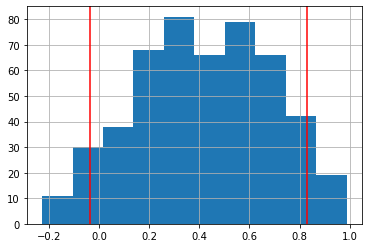

In [15]:
results_full['diff'] = results_full['R2 Scores_h']-results_full['R2 Scores_s']
display(results_full.head())
results_full['diff'].hist()
plt.axvline(results_full['diff'].quantile(0.05), color='r')
plt.axvline(results_full['diff'].quantile(0.95), color='r')
print('90%% range is %4.3f to %4.3f' % 
      (results_full['diff'].quantile(0.05), results_full['diff'].quantile(0.95)))

## Section 3.0: Predicting the Number of Storks

Within this section we are focusing on predicting the number of storks using linear regression and then multiple linear regression as well as using different predictors.

Below, we perform a linear regression using Area to predict Storks. We can initally see that up to the 250000 mark for Area, the points are quite close to the line and a there is a fairly clear positive correlation. However, after this point the distribution is far more scattered and it does not appear to fit the line. The $r^2$ score is 0.336 which is quite low, showing that only 33.6% of the data variance is accounted for by using Area as a predictor. We also introduce a new parameter for scoring, that being Root Mean Squared Error. This can be used to compare models and is useful to see how accurately a model has predicted y-values. The lower the RMSE the better the model has performed at predicting y-values, this also has to take into account the scale of the variables. Here we achieve an RMSE of 6984.767. We can interpret this value as the average error between the predicted and actual values. This value is quite high as Storks only ranges from 0 to 30000 so an average error of nearly 7000 is quite high. However, as the RMSE is an estimator of the mean it is therefore susceptible to outliers. From looking at the data, the extremely high value of Storks at approximately 30000 may be influencing this RMSE score and the regression may be more accurate by removing it.  

Coefficients: 0.023
Intercept: -60.687
r2 Score: 0.336
RMSE: 6984.767


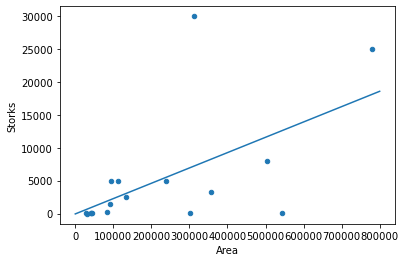

In [44]:
reg3 = LinearRegression().fit(area,storks)
df.plot.scatter('Area','Storks')
ranges3 = np.arange(0,810000,10000).reshape(-1,1)
plt.plot(ranges3,reg3.predict(ranges3))
reg3.score(area,storks)
print('Coefficients: ' + str(np.round(reg3.coef_.squeeze(),3)))
print('Intercept: ' + str(np.round(reg3.intercept_.squeeze(),3)))
print('r2 Score: ' + str(np.round(reg3.score(area,storks),3)))
print('RMSE: ' + str(np.round(mean_squared_error(storks, reg3.predict(area), squared=False),3)))

## Section 3.1: Creating New Variables

The variables required for the multiple linear regression are Population Density (of humans) and Suitable Area (for Stork life). To create Population Density, we first multiply Humans by $10^6$ to get the original values, for example, 3.2 = 3,200,000 people. We then divide this value by the corresponding Area value to get the amount of people per km<sup>2</sup>

The Suitable Area is calculated by turning SuitableAreaPercent back into a decimal by dividing by 100, then multiplying this by Area.  

In [17]:
df['pop_dens'] = df.Humans*10**6/df.Area
df['suitable_area'] = df.Area*(df.SuitableAreaPercent/100)
df.head()

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,pop_dens,suitable_area
0,Albania,28750,100,3.2,83,55.68,111.304348,16008.000
1,Austria,83860,300,7.6,87,38.34,90.627236,32151.924
2,Belgium,30520,1,9.9,118,65.93,324.377457,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,81.081081,64368.900
4,Denmark,43100,9,5.1,59,81.46,118.329466,35109.260


The results of this multiple linear regression do not appear to be much better than using just one predictor, with only slightly better R2 and RMSE scores achieved. As we have used more than 1 predictor, it is harder to plot the actual linear regression line as in this case it would be a plane due to having 2 predictors. To get around this we plot a scatter graph of the predicted y-values vs actual y-values, then plot a line of the predicted y-values. The better the regression, the closer to the line the points would be. We receive a similar distribution to our single linear regression above, that the regression is better at predicting values at around 5000 storks, but over this limit the distribution becomes more scattered and the regressor becomes less accurate. 

In [52]:
X = np.column_stack((df.pop_dens,df.suitable_area))
reg4 = LinearRegression().fit(X,storks)
y_hat = reg4.predict(X)
print('R2 score: ' + str(np.round(reg4.score(X,storks),3)))
print('Coefficients: ' + str(reg4.coef_))
print('Intercept: ' + str(reg4.intercept_))
print('RMSE: ' + str(np.round(mean_squared_error(storks,y_hat,squared=False),3)))

R2 score: 0.393
Coefficients: [[-12.133   0.037]]
Intercept: [1881.387]
RMSE: 6677.029


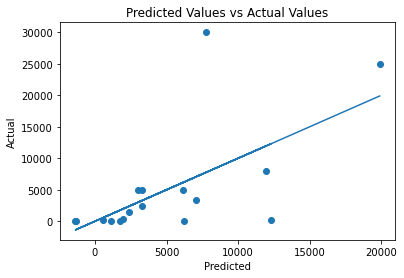

In [53]:
plt.scatter(y_hat,storks)
plt.plot(y_hat,y_hat)
plt.title('Predicted Values vs Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
def doReg2(predict,target):
    x = predict.to_numpy().reshape(-1,1)
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)
    return mean_squared_error(y, y_hat, squared=False)

doReg2(df.Area,df.Storks)

6984.766863832696

In [20]:
def doReg3(pred1,pred2,target):
    X = np.column_stack((pred1,pred2))
    y = target.to_numpy().reshape(-1,1)    
    reg = LinearRegression().fit(X,y)
    y_hat = reg.predict(X)
    return mean_squared_error(y, y_hat, squared=False)
doReg3(df.pop_dens,df.suitable_area,df.Storks)

6677.0286930693765

In [46]:
results = []

for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['Area','Storks']].iloc[sample]
    results.append(doReg2(sample.Area,sample.Storks))
results_a_s = pd.DataFrame(results).rename(columns={0:'RMSE_a'})
results_a_s.head()

,RMSE_a
0,3391.705620
1,8789.498188
2,8876.599546
3,8456.890438
4,3180.527980


In [47]:
results = []
for i in range(500):
    sample = np.random.choice(range(len(df)),replace=True, size=len(df))
    sample = df[['pop_dens','Area','Storks']].iloc[sample]
    results.append(doReg3(sample.pop_dens,sample.Area,sample.Storks))
results_p_s = pd.DataFrame(results).rename(columns={0:'RMSE_p'})
results_p_s.head()

,RMSE_p
0,6571.002053
1,6803.402328
2,4234.833627
3,6972.259409
4,8102.998114


,RMSE_a,RMSE_p,diff
0,3391.705620,6571.002053,-3179.296433
1,8789.498188,6803.402328,1986.095860
2,8876.599546,4234.833627,4641.765919
3,8456.890438,6972.259409,1484.631029
4,3180.527980,8102.998114,-4922.470135


90% range is -5421.532 to 6045.896


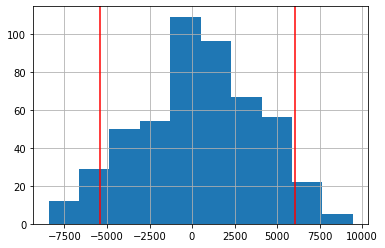

In [48]:
results_full2 = results_a_s.join(results_p_s)
results_full2['diff'] = results_full2['RMSE_a'] - results_full2['RMSE_p']
display(results_full2.head())
results_full2['diff'].hist()
plt.axvline(results_full2['diff'].quantile(0.05), color='r')
plt.axvline(results_full2['diff'].quantile(0.95), color='r')
print('90%% range is %4.3f to %4.3f' % 
      (results_full2['diff'].quantile(0.05), results_full2['diff'].quantile(0.95)))

In [24]:
score_range = df.Storks.quantile(0.9) - df.Storks.quantile(0.1)
pop_dens_range = df.pop_dens.quantile(0.9) - df.pop_dens.quantile(0.1)
suitable_area_range = df.suitable_area.quantile(0.9) - df.suitable_area.quantile(0.1)
print(f'The change in Storks (as a percent of its range) given by the pop_dens coefficient (over its range) is {np.round(100*(reg4.coef_[0][0]*pop_dens_range)/score_range,2)}%')
print(f'The change in Storks (as a percent of its range) given by the suitable_area coefficient (over its range) is {np.round(100*(reg4.coef_[0][1]*suitable_area_range)/score_range,2)}%')

The change in Storks (as a percent of its range) given by the pop_dens coefficient (over its range) is -15.1%
The change in Storks (as a percent of its range) given by the suitable_area coefficient (over its range) is 71.56%
